In [1]:
from pyspark.sql.types import * 
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
sc = SparkContext.getOrCreate();

spark = SparkSession(sc)

unsw_nb15 = StructType([
    StructField("srcip",StringType(),True),
    StructField("sport",IntegerType(),True),
    StructField("dstip",StringType(),True),
    StructField("dsport",IntegerType(),True),
    StructField("proto",StringType(),True),
    StructField("state",StringType(),True),
    StructField("dur",FloatType(),True),
    StructField("sbytes",IntegerType(),True),
    StructField("dbytes",IntegerType(),True),
    StructField("sttl",IntegerType(),True),
    StructField("dttl",IntegerType(),True),
    StructField("sloss",IntegerType(),True),
    StructField("dloss",IntegerType(),True),
    StructField("service",StringType(),True),
    StructField("Sload",FloatType(),True),
    StructField("Dload",FloatType(),True),
    StructField("Spkts",IntegerType(),True),
    StructField("Dpkts",IntegerType(),True),
    StructField("swin",IntegerType(),True),
    StructField("dwin",IntegerType(),True),
    StructField("stcpb",IntegerType(),True),
    StructField("dtcpb",IntegerType(),True),
    StructField("smeansz",IntegerType(),True),
    StructField("dmeansz",IntegerType(),True),
    StructField("trans_depth",IntegerType(),True),
    StructField("res_bdy_len",IntegerType(),True),
    StructField("Sjit",FloatType(),True),
    StructField("Djit",FloatType(),True),
    StructField("Stime",TimestampType(),True),
    StructField("Ltime",TimestampType(),True),
    StructField("Sintpkt",FloatType(),True),
    StructField("Dintpkt",FloatType(),True),
    StructField("tcprtt",FloatType(),True),
    StructField("synack",FloatType(),True),
    StructField("ackdat",FloatType(),True),
    StructField("is_sm_ips_ports",StringType(),True),
    StructField("ct_state_ttl",IntegerType(),True),
    StructField("ct_flw_http_mthd",IntegerType(),True),
    StructField("is_ftp_login",StringType(),True),
    StructField("ct_ftp_cmd",IntegerType(),True),
    StructField("ct_srv_src",IntegerType(),True),
    StructField("ct_srv_dst",IntegerType(),True),
    StructField("ct_dst_ltm",IntegerType(),True),
    StructField("ct_src_ltm",IntegerType(),True),
    StructField("ct_src_dport_ltm",IntegerType(),True),
    StructField("ct_dst_sport_ltm",IntegerType(),True),
    StructField("ct_dst_src_ltm",IntegerType(),True),
    StructField("attack_cat",StringType(),True),
    StructField("Label",IntegerType(),True)
])

unsw_nb15_df = spark.read.schema(unsw_nb15).format("csv").load("hdfs://localhost:9000/DataAnalysis/UNSW-NB15.csv").toDF("srcip","sport","dstip","dsport","proto","state","dur","sbytes","dbytes","sttl",
     "dttl","sloss","dloss","service","Sload","Dload","Spkts","Dpkts","swin","dwin",
     "stcpb","dtcpb","smeansz","dmeansz","trans_depth","res_bdy_len","Sjit","Djit",
     "Stime","Ltime","Sintpkt","Dintpkt","tcprtt","synack","ackdat","is_sm_ips_ports",
     "ct_state_ttl","ct_flw_http_mthd","is_ftp_login","ct_ftp_cmd","ct_srv_src",
     "ct_srv_dst","ct_dst_ltm","ct_src_ltm","ct_src_dport_ltm","ct_dst_sport_ltm",
     "ct_dst_src_ltm","attack_cat","Label")


24/05/04 11:43:56 WARN Utils: Your hostname, bunmialex-virtual-machine resolves to a loopback address: 127.0.1.1; using 192.168.23.128 instead (on interface ens33)
24/05/04 11:43:56 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/04 11:43:58 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/05/04 11:44:00 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
24/05/04 11:44:00 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


In [2]:
unsw_nb15_stat_df = unsw_nb15_df.select("dur","Spkts","Dpkts","sbytes","dbytes","sttl","dttl","Sload","Dload","sloss","dloss","Sjit","Djit","swin","dwin","stcpb","dtcpb","tcprtt","synack","ackdat","smeansz","dmeansz","trans_depth","res_bdy_len","ct_srv_src","ct_state_ttl","ct_dst_ltm","ct_src_dport_ltm","ct_dst_sport_ltm","ct_dst_src_ltm","is_ftp_login","ct_ftp_cmd","ct_flw_http_mthd","ct_src_ltm","ct_srv_dst","is_sm_ips_ports","proto","service","state");

In [9]:
pandas_unsw_nb15_df = unsw_nb15_df.toPandas()

Py4JJavaError: An error occurred while calling o30.collectToPython.
: java.lang.OutOfMemoryError: Java heap space
	at org.apache.spark.sql.execution.SparkPlan$$anon$1.next(SparkPlan.scala:377)
	at org.apache.spark.sql.execution.SparkPlan$$anon$1.next(SparkPlan.scala:373)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at org.apache.spark.sql.execution.SparkPlan$$anon$1.foreach(SparkPlan.scala:373)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeCollect$1(SparkPlan.scala:395)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeCollect$1$adapted(SparkPlan.scala:394)
	at org.apache.spark.sql.execution.SparkPlan$$Lambda$3355/1906352640.apply(Unknown Source)
	at scala.collection.IndexedSeqOptimized.foreach(IndexedSeqOptimized.scala:36)
	at scala.collection.IndexedSeqOptimized.foreach$(IndexedSeqOptimized.scala:33)
	at scala.collection.mutable.ArrayOps$ofRef.foreach(ArrayOps.scala:198)
	at org.apache.spark.sql.execution.SparkPlan.executeCollect(SparkPlan.scala:394)
	at org.apache.spark.sql.Dataset.$anonfun$collectToPython$1(Dataset.scala:3538)
	at org.apache.spark.sql.Dataset$$Lambda$3043/1360689196.apply(Unknown Source)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:3706)
	at org.apache.spark.sql.Dataset$$Lambda$3044/1308160726.apply(Unknown Source)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$5(SQLExecution.scala:103)
	at org.apache.spark.sql.execution.SQLExecution$$$Lambda$3049/1810547342.apply(Unknown Source)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:163)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:90)
	at org.apache.spark.sql.execution.SQLExecution$$$Lambda$3045/957262425.apply(Unknown Source)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:775)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3704)
	at org.apache.spark.sql.Dataset.collectToPython(Dataset.scala:3535)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)


In [3]:
unsw_nb15_stat_df.summary().toPandas()

24/05/02 16:57:16 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,summary,dur,Spkts,Dpkts,sbytes,dbytes,sttl,dttl,Sload,Dload,...,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,proto,service,state
0,count,2539739,2539739,2539739,2539739,2539739,2539739,2539739,2539739,2539739,...,2539739,2539739,2539739,2539739,2539739,2539739,2539739,2539739,2539739,2539739
1,mean,0.6588634003999809,33.2925678583508,42.731821655689814,4340.072263330996,36432.01132478574,62.78149802007214,30.770440978384,3.694927929101865E7,2451158.4380010013,...,6.84655746121944,0.01735335796316078,0.020560380417042855,0.11009123378425893,6.901640286659378,8.989882818667587,0.001651744529654425,None,None,None
2,stddev,13.92576763644114,76.28775585678378,121.50842004704197,56409.39812286232,161105.30400824756,74.62669956848524,42.851922189518724,1.1860413778897691E8,4225032.897361651,...,11.258797786324628,0.13346510417617913,0.1843730431164465,0.5564518805021055,8.205340175616495,10.822813466163238,0.040608089328964335,None,None,None
3,min,0.0,0,0,0,0,0,0,0.0,0.0,...,1,0,0,0,1,1,0,3pc,-,ACC
4,25%,0.001037,2,2,200,178,31,29,135354.89,11935.401,...,1,0.0,0,0,2,2,0.0,None,None,None
5,50%,0.015863,12,12,1470,1820,31,29,589303.75,589398.06,...,2,0.0,0,0,4,5,0.0,None,None,None
6,75%,0.214385,44,42,3182,14908,31,29,2036831.1,2926335.2,...,5,0.0,0,0,7,10,0.0,None,None,None
7,max,8786.638,10646,11018,14355774,14657531,255,254,5.9880003E9,1.28761904E8,...,67,4,8,36,67,67,1,zero,ssl,no


In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [36]:
sttldttl_df = unsw_nb15_df.describe("sttl","dttl").toPandas()
sttldttl_df

,summary,sttl,dttl
0,count,2539739,2539739
1,mean,62.78149802007214,30.770440978384
2,stddev,74.62669956848524,42.851922189518724
3,min,0,0
4,max,255,254


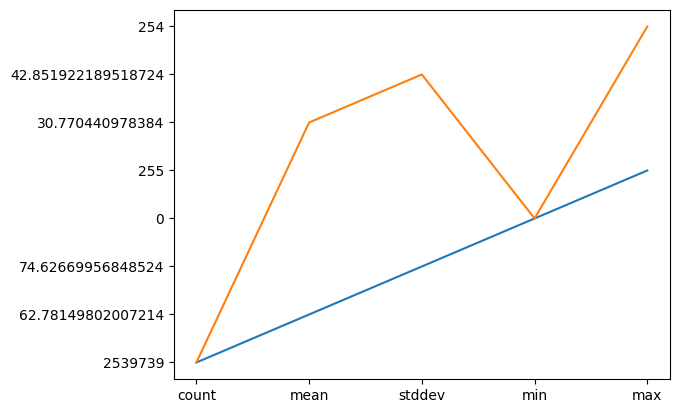

In [37]:
plt.plot(sttldttl_df.summary,sttldttl_df.sttl)
plt.plot(sttldttl_df.summary,sttldttl_df.dttl)

In [54]:
unsw_nb15_desc_df = unsw_nb15_df.summary().toPandas()

In [6]:
unsw_nb15_desc_df.describe().show()

NameError: name 'unsw_nb15_desc_df' is not defined

In [63]:
unsw_nb15_desc_df

,summary,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,count,2539739,2539739,2539739,2539739,2539739,2539739,2539739,2539739,2539739,...,2539739,2539739,2539739,2539739,2539739,2539739,2539739,2539739,321283,2539739
1,mean,None,30536.93108583205,None,11235.096788685767,None,None,0.6588634003999809,4340.072263330996,36432.01132478574,...,0.020560380417042855,9.207911915358231,8.989882818667587,6.439727074317479,6.901640286659378,4.642571933572702,3.593031803661715,6.84655746121944,None,0.1265023689442104
2,stddev,None,20441.216792342224,None,18438.20083577165,None,None,13.92576763644114,56409.39812286232,161105.30400824756,...,0.1843730431164465,10.837080948770966,10.822813466163238,8.162329925209063,8.205340175616495,8.478001123292248,6.174757636883334,11.258797786324628,None,0.33241474561750184
3,min,10.40.170.2,0,10.40.170.2,0,3pc,ACC,0.0,0,0,...,0,1,1,1,1,1,1,1,Analysis,0
4,25%,None,11230,None,53,None,None,0.001037,200,178,...,0,2,2,2,2,1,1,1,None,0
5,50%,None,31687,None,80,None,None,0.015863,1470,1820,...,0,5,5,3,4,1,1,2,None,0
6,75%,None,47439,None,14961,None,None,0.214385,3182,14908,...,0,11,10,6,7,2,1,5,None,0
7,max,59.166.0.9,65535,59.166.0.9,65535,zero,no,8786.638,14355774,14657531,...,8,67,67,67,67,67,60,67,Worms,1


In [2]:
unsw_nb15_df.groupby("attack_cat").agg(f.count("label").alias("no_of_attacks")).show()

NameError: name 'f' is not defined

In [92]:
unsw_nb15_events = StructType([
    StructField("attack_category",StringType(),True),
    StructField("attack_subcategory",StringType(),True),
    StructField("number_of_events",IntegerType(),True)
])
unsw_nb15_events_df = spark.read.schema(unsw_nb15_events).format("csv").load("file:///home/bunmialex/Documents/UNSW-NB15_LIST_EVENTS.csv").toDF("attack_category","attack_subcategory","number_of_events")

In [94]:
unsw_nb15_events_df.describe().show()

+-------+---------------+------------------+------------------+
|summary|attack_category|attack_subcategory|  number_of_events|
+-------+---------------+------------------+------------------+
|  count|            207|               207|               208|
|   mean|           null|              null|           24423.5|
| stddev|           null|              null|233581.31560561154|
|    min|        Fuzzers|                  |                 1|
|    max|         normal|            XINETD|           2540044|
+-------+---------------+------------------+------------------+



In [10]:
unsw_nb15_df.cov("Sintpkt","Dintpkt")

2009143.292746719

In [3]:
from pyspark.ml.stat import Correlation

In [41]:
unsw_nb15_df.show()

+----------+-----+-------------+------+-----+-----+--------+------+------+----+----+-----+-----+--------+---------+---------+-----+-----+----+----+----------+----------+-------+-------+-----------+-----------+---------+---------+-----+-----+---------+---------+-------+-------+-------+---------------+------------+----------------+------------+----------+----------+----------+----------+----------+----------------+----------------+--------------+----------+-----+
|     srcip|sport|        dstip|dsport|proto|state|     dur|sbytes|dbytes|sttl|dttl|sloss|dloss| service|    Sload|    Dload|Spkts|Dpkts|swin|dwin|     stcpb|     dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|     Sjit|     Djit|Stime|Ltime|  Sintpkt|  Dintpkt| tcprtt| synack| ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|attack_cat|Label|
+----------+-----+-------------+------+-----+-----+--------+------+-

In [71]:
durBytes_df = unsw_nb15_df.select(unsw_nb15_df["dur"],unsw_nb15_df["sbytes"],unsw_nb15_df["dbytes"]).toPandas()

/tmp/ipykernel_3726/3783304932.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


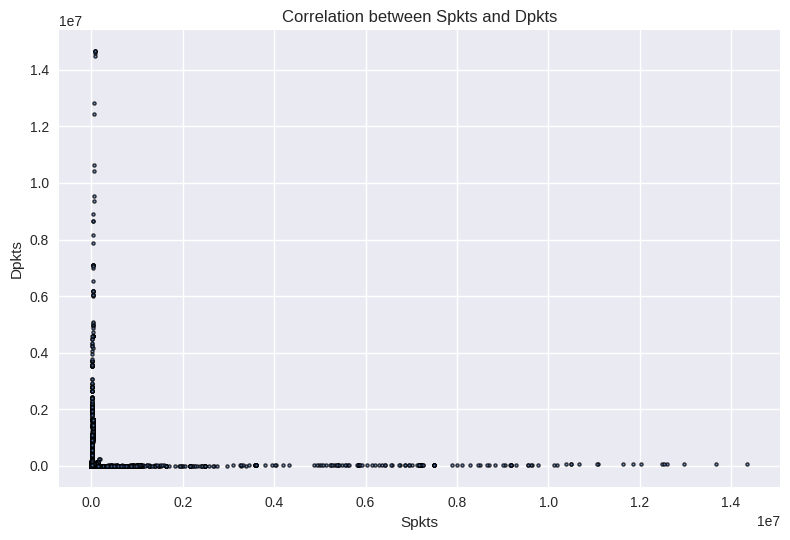

In [58]:
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('seaborn')
x = durBytes_df.sbytes
y = durBytes_df.dbytes

plt.scatter(x,y,s=5, edgecolor='black',linewidth=1, alpha=0.75)

plt.title('Correlation between Spkts and Dpkts')
plt.xlabel('Spkts')
plt.ylabel('Dpkts')

plt.tight_layout()

plt.show()

In [25]:
from pyspark.sql.types import * 

In [4]:
unsw_nb15_df.createOrReplaceTempView("unsw_nb15_df")

24/05/01 17:34:42 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [55]:
dur_attack_df = unsw_nb15_df.select("dur").filter("label='1'").toPandas()
dur_normal_df = unsw_nb15_df.select("dur").filter("label='0'").toPandas()
sbytes_attack_df = unsw_nb15_df.select("sbytes").filter("label='1'").toPandas()
sbytes_normal_df = unsw_nb15_df.select("sbytes").filter("label='0'").toPandas()
dbytes_attack_df = unsw_nb15_df.select("dbytes").filter("label='1'").toPandas()
dbytes_normal_df = unsw_nb15_df.select("dbytes").filter("label='0'").toPandas()

In [56]:
sbytes_attack_df.count()

sbytes    321283
dtype: int64

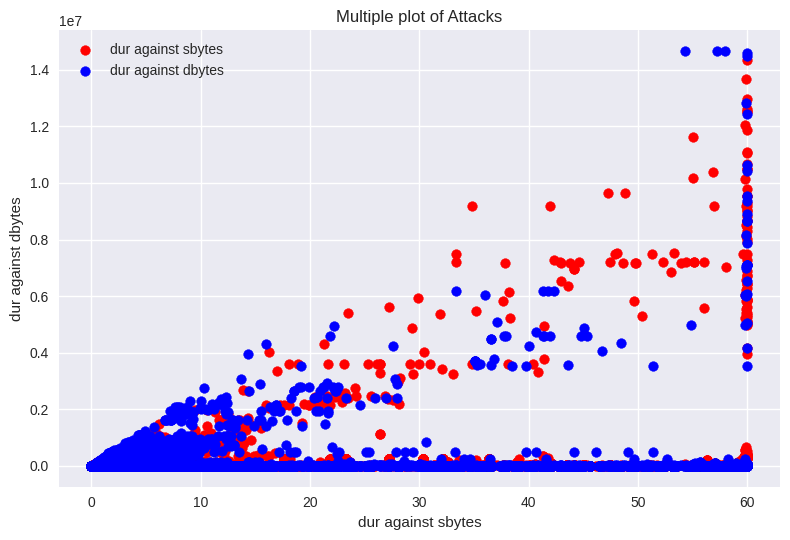

In [90]:

x = dur_attack_df.dur
y1 = sbytes_attack_df.sbytes
y2 = dbytes_attack_df.dbytes

plt.scatter(x, y1, color='red')
plt.scatter(x, y2, color='blue')

plt.title('Multiple plot of Attacks')
plt.xlabel('dur against sbytes')
plt.ylabel('dur against dbytes')
plt.legend(["dur against sbytes","dur against dbytes"])

plt.tight_layout()

plt.show()


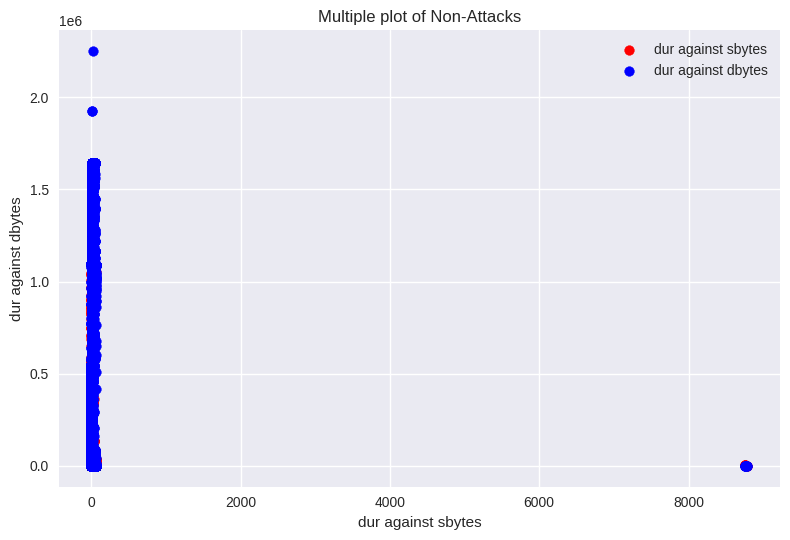

In [89]:
x = dur_normal_df.dur
y1 = sbytes_normal_df.sbytes
y2 = dbytes_normal_df.dbytes

plt.scatter(x, y1, color='red')
plt.scatter(x, y2, color='blue')

plt.title('Multiple plot of Non-Attacks')
plt.xlabel('dur against sbytes')
plt.ylabel('dur against dbytes')
plt.legend(["dur against sbytes","dur against dbytes"])

plt.tight_layout()


plt.show()

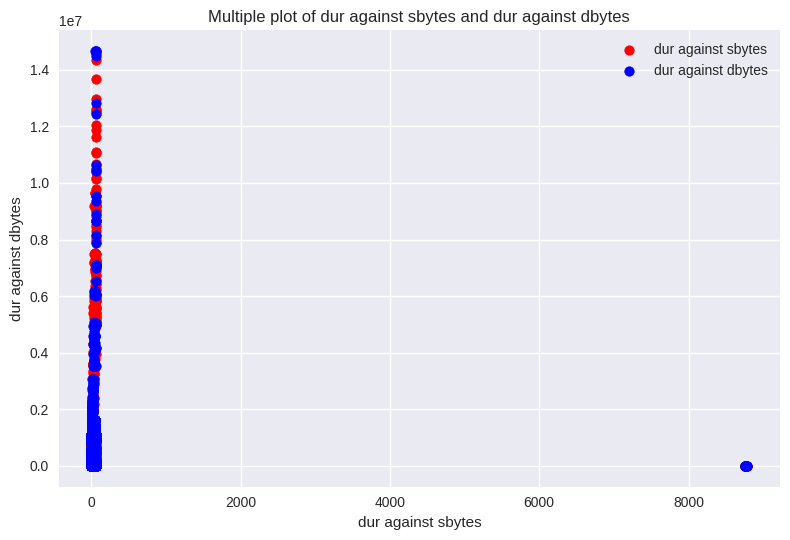

In [87]:
x = durBytes_df.dur
y1 = durBytes_df.sbytes
y2 = durBytes_df.dbytes

plt.scatter(x, y1, color='red')
plt.scatter(x, y2, color='blue')

plt.title('Multiple plot of dur against sbytes and dur against dbytes')
plt.xlabel('dur against sbytes')
plt.ylabel('dur against dbytes')
plt.legend(["dur against sbytes","dur against dbytes"])

plt.tight_layout()

plt.show()

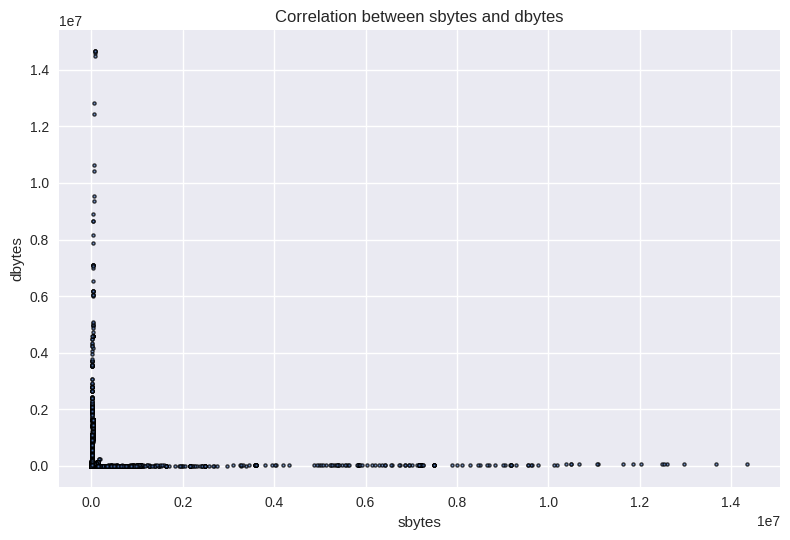

In [77]:

x = durBytes_df.sbytes
y = durBytes_df.dbytes

plt.scatter(x,y,s=5, edgecolor='black',linewidth=1, alpha=0.75)

plt.title('Correlation between sbytes and dbytes')
plt.xlabel('sbytes')
plt.ylabel('dbytes')

plt.tight_layout()

plt.show()